# ResNet в Keras

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.0001)


def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                     #  height_shift_range=0.2, 
                                     #  vertical_flip=True, 
                                     #  horizontal_flip=True,
                                     #  rotation_range=90,
                                     #  width_shift_range=0.2, 
                                      rescale=1./255)

    train_datagen_flow = train_datagen.flow_from_directory(
        path + '/',
        target_size=(150, 150),
        batch_size=16,
        class_mode='sparse',
        subset='training',
        seed=12345)

    return train_datagen_flow 


def create_model(input_shape):
    backbone = ResNet50(input_shape=(150, 150, 3),
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False) 
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=3,
               steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

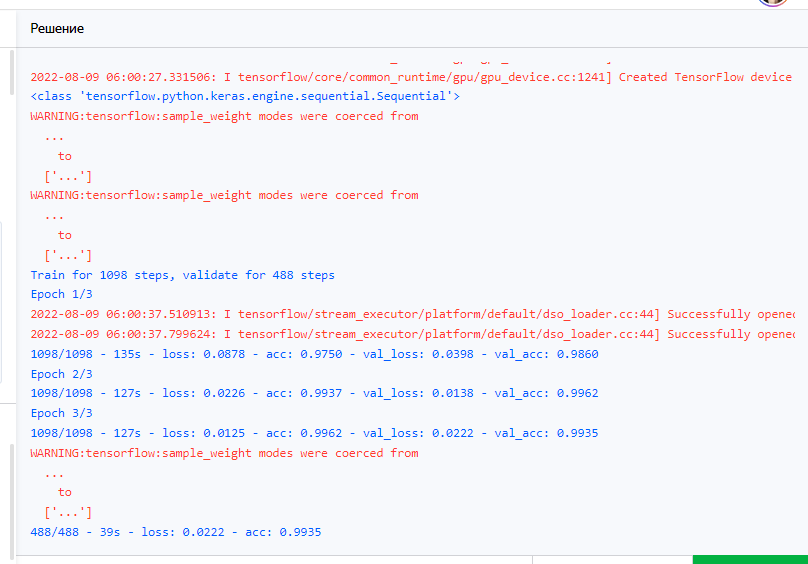